In [2]:
import numpy as np
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

f = open("hurriyet.txt","r",encoding="utf-8")
text = f.read()
t_list = text.split("\n")
corpus = []
for cumle in t_list:
    corpus.append(cumle.split())
corpus[3]    

C:\Users\oztur\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


['musevi', 'ye', 'ölüm', 've', 'idam', 'idam', 'sloganları', 'duyuldu']

In [6]:
# KElime vektorleri 100 uzunlugunda
# merkezdeki kelimenin sag ve solunda +5,-5 kelimeye bakiyor
# min_count=5 nadir kelimeleri ele
# sg=1 skip-gram

model = Word2Vec(corpus,size = 100,window = 5,min_count = 5, sg = 1)
#model.wv["ankara"]

In [8]:
model.wv.most_similar("el")

C:\Users\oztur\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('kaide', 0.8135417699813843),
 ('şeyh', 0.7536946535110474),
 ('al', 0.7449068427085876),
 ('ebu', 0.7441399097442627),
 ('es', 0.7376000881195068),
 ('ahmed', 0.7151355147361755),
 ('masri', 0.7069560885429382),
 ('muhammed', 0.7018314003944397),
 ('ayman', 0.6980113983154297),
 ('nusra', 0.6974803805351257)]

In [12]:
model.save("word2vec.model")

In [13]:
model = Word2Vec.load("word2vec.model")

In [14]:
def closestwords_tsneplot(model,word):
    
    word_vectors = np.empty((0,100))
    word_labels = [word]
    
    close_words = model.wv.most_similar(word)
    
    word_vectors = np.append(word_vectors,np.array([model.wv[word]]),axis = 0)
    
    for w, _ in close_words:
        word_labels.append(w)
        word_vectors = np.append(word_vectors,np.array([model.wv[w]]),axis=0)
    tsne = TSNE(random_state=0)
    Y = tsne.fit_transform(word_vectors)
    
    x_coords = Y[:,0]
    y_coords = Y[:,1]
    
    plt.scatter(x_coords, y_coords)
    
    for label, x, y in zip(word_labels, x_coords,y_coords):
        plt.annotate(label,xy=(x,y),xytext=(5,-2),textcoords="offset points")
    plt.show()
    

C:\Users\oztur\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


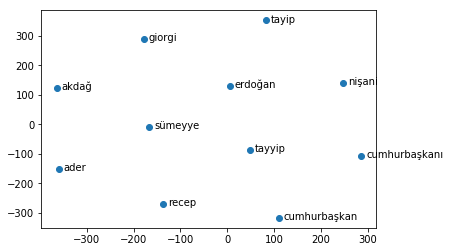

In [21]:
closestwords_tsneplot(model,"recep")

In [17]:
model.most_similar(positive=["akşam","bugün"],negative=["sabah"],topn=1)

C:\Users\oztur\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
C:\Users\oztur\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('yarın', 0.7689382433891296)]

In [18]:
model.most_similar(positive=["akşam","sonra"],negative=["sabah"],topn=1)

C:\Users\oztur\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
C:\Users\oztur\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('önce', 0.7587019205093384)]

In [19]:
model.most_similar(positive=["anne","kadın"],negative=["baba"],topn=5)

C:\Users\oztur\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
C:\Users\oztur\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('erkek', 0.6662831902503967),
 ('çocuk', 0.6437509059906006),
 ('çocuktan', 0.6134855151176453),
 ('yetişkin', 0.6072823405265808),
 ('genç', 0.6055552363395691)]